In [16]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [17]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

data = []
paths = []
result = []

for r, d, f in os.walk(r'D:\\Education\\Research Paper for Masters\\Brain Dataset\\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [18]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"D:\\Education\\Research Paper for Masters\\Brain Dataset\\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())       


data = np.array(data)
data.shape

(2892, 128, 128, 3)

In [19]:
result = np.array(result)
len(result)
result = result.reshape(2892,2)
print(result)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [20]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [21]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeUniform

import tensorflow as tf

model = Sequential()
activation = 'relu'
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation = activation, padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation = activation, padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation = activation, padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(2 ,activation ='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])
#print(model.summary())


y_train.shape

history = model.fit(x_train, y_train, epochs = 11, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/11
58/58 [==============================] - 80s 1s/step - loss: 13.7427 - accuracy: 0.7406 - val_loss: 1.8259 - val_accuracy: 0.6839
Epoch 2/11
58/58 [==============================] - 79s 1s/step - loss: 0.6205 - accuracy: 0.8180 - val_loss: 0.8964 - val_accuracy: 0.8256
Epoch 3/11
58/58 [==============================] - 79s 1s/step - loss: 0.2587 - accuracy: 0.9105 - val_loss: 1.3833 - val_accuracy: 0.8670
Epoch 4/11
58/58 [==============================] - 79s 1s/step - loss: 0.1062 - accuracy: 0.9680 - val_loss: 0.7154 - val_accuracy: 0.8929
Epoch 5/11
58/58 [==============================] - 79s 1s/step - loss: 0.1095 - accuracy: 0.9715 - val_loss: 0.1962 - val_accuracy: 0.9413
Epoch 6/11
58/58 [==============================] - 79s 1s/step - loss: 0.0536 - accuracy: 0.9849 - val_loss: 1.6301 - val_accuracy: 0.8549
Epoch 7/11
58/58 [==============================] - 79s 1s/step - loss: 0.0442 - accuracy: 0.9909 - val_loss: 0.5464 - val_accuracy: 0.9016
Epoch 8/11
58/58 [=

In [22]:
def names(number):
    if number==0:
        return 'it has  a Tumor'
        a==1
    else:
        return 'there are no tumor'
        a==0

In [1]:
import matplotlib.pyplot as plt
img = Image.open(r"D:\\Education\\Research Paper for Masters\\Brain Dataset\\pred\\pred7.jpg")
plt.xlabel('Sample Image')
plt.imshow(img)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]

print(str(res[0][0]*100) + '% Confidence ' + names(classification))

NameError: name 'Image' is not defined

In [33]:
print(model.evaluate(x_test, y_test))

19/19 [==============================] - 3s 141ms/step - loss: 0.4951 - accuracy: 0.9378
[0.49514371156692505, 0.9378238320350647]


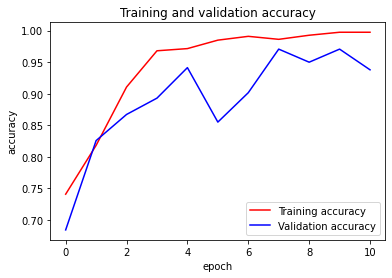

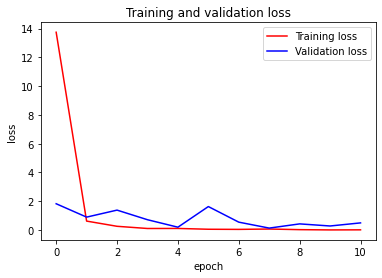

In [34]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [35]:
model.evaluate(x_train, y_train)


#print("[INFO] Loss: {}".format(eval_loss))


73/73 [==============================] - 10s 143ms/step - loss: 0.1586 - accuracy: 0.9771


[0.15855655074119568, 0.9770860075950623]

In [36]:
acc[10]*100 #accuracy %

99.74059462547302